## FIFA (水果)盃足球賽開打了，你有辦法預測比賽的勝負嗎？

> 本次資料集搜集了`一百萬`場比賽的勝負數據，以及該場比賽`兩隊的陣勢`，以及每個位置`球員的能力值`

***期望各位數據科學家們，找到其中的蛛絲馬跡，掌握比賽的勝負！***

In [42]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import warnings
import seaborn as sns
import collections
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv('./fifa-predict/data/totalScore_1121_2.csv')

In [103]:
df.head()

,t1form,t1p0,t1p1,t1p2,t1p3,t1p4,t1p5,t1p6,t1p7,t1p8,...,t2p7,t2p8,t2p9,t2p10,t2p11,t2p12,t2p13,t1Score,t2Score,winner
0,3-5-2,6.0,8.2,6.9,6.6,9.9,5.1,5.7,6.4,5.2,...,6.7,8.4,5.6,7.2,8.0,8.9,6.8,1,2,2
1,3-4-3,7.0,7.3,8.2,5.2,7.3,9.9,5.9,5.5,7.2,...,6.3,7.4,9.0,8.9,6.9,5.5,8.1,2,4,2
2,4-5-1,5.4,9.8,7.2,9.2,6.9,8.3,7.8,8.4,6.4,...,9.5,7.5,9.2,9.2,6.7,9.9,5.1,0,1,2
3,4-3-3,9.6,9.8,8.1,9.3,6.3,7.7,5.4,5.7,6.1,...,7.2,9.7,7.7,7.2,9.4,6.5,9.3,2,4,2
4,3-6-1,7.2,6.2,7.8,7.5,7.8,8.9,5.4,7.3,7.4,...,6.8,9.4,6.9,7.8,6.6,6.1,6.0,4,6,2


In [105]:
df.columns

Index(['t1form', 't1p0', 't1p1', 't1p2', 't1p3', 't1p4', 't1p5', 't1p6',
       't1p7', 't1p8', 't1p9', 't1p10', 't1p11', 't1p12', 't1p13', 't2form',
       't2p0', 't2p1', 't2p2', 't2p3', 't2p4', 't2p5', 't2p6', 't2p7', 't2p8',
       't2p9', 't2p10', 't2p11', 't2p12', 't2p13', 't1Score', 't2Score',
       'winner'],
      dtype='object')

### 欄位說明

* `t1` 代表第一隊， `t2` 代表第二隊
* `p0 - p13` 代表球場上的 13 名球員，位置先不透露
* `t1Score` 是第一隊分數 `t2Score` 是第二隊分數
* `winner` 1 代表第一隊贏，2 代表第二隊贏 

In [5]:
print(f'一共有 {df.shape[0]} 場比賽資料，包含 {df.shape[1]} 個欄位 ')

一共有 1000000 場比賽資料，包含 33 個欄位 


### 首先想看看分數的差距，跟特徵的相關性，先加入差距欄位

In [6]:
df['diff'] = df.apply(lambda row: abs(row['t1Score'] - row['t2Score']), axis=1)

### [簡化資料] 賽事結果是相對的，試試看先只考慮相對位置能力值的差距

In [51]:
df_new = pd.DataFrame()

for i in range(0, 14):
    t1_col = 't1p' + str(i)
    t2_col = 't2p' + str(i)
    df_new['p' + str(i)] = df[t1_col] - df[t2_col]
    
df_new['score'] = df['t1Score'] - df['t2Score']
df_new['win'] = [1 if x == 1 else 0 for x in df['winner']] 

In [32]:
df_new.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,t2form_3-5-2,t2form_3-6-1,t2form_4-2-2-2,t2form_4-2-3-1,t2form_4-3-2-1,t2form_4-3-3,t2form_4-4-2,t2form_4-5-1,t2form_5-3-2,t2form_5-4-1
0,0.2,1.9,-2.4,-3.3,3.6,-4.3,-1.1,-0.3,-3.2,2.8,...,0,0,1,0,0,0,0,0,0,0
1,-1.1,-0.2,-0.8,-1.5,1.8,0.5,-0.7,-0.8,-0.2,-2.3,...,0,0,0,1,0,0,0,0,0,0
2,-3.6,4.1,-0.5,-0.1,0.3,2.1,-0.5,-1.1,-1.1,-3.7,...,1,0,0,0,0,0,0,0,0,0
3,0.8,4.7,0.6,0.6,1.1,1.6,-2.2,-1.5,-3.6,-1.5,...,1,0,0,0,0,0,0,0,0,0
4,-2.4,-1.2,0.6,-0.1,0.0,1.7,-4.4,0.5,-2.0,-0.4,...,1,0,0,0,0,0,0,0,0,0


In [46]:
result = dict(collections.Counter(df_new['win']))
print(f'第一隊贏了 {result[1]} 次，輸了 {result[0]} 次')

第一隊贏了 499792 次，輸了 500208 次


In [8]:
train_features = ['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13']

In [9]:
X = df_new[train_features].values
y = df_new[['win']].values

### xgboost 是分類演算法神器，不確定怎麼用就先套這個吧！

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 切分訓練集以及測試集

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

In [12]:
model = XGBClassifier(nthread=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [14]:
test_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, test_pred)
print('牛刀小試一下，準確率:', acc)

準確率: 0.6522933333333333


## [動動腦] 學習機器學習不能知道準確性偏誤的可怕

> 某種疾病，每一千個患者才出現一名陽性反應，如今導入一個號稱準確率 99.9% 的神奇模型，請問該怎麼做？

Ans. 全部猜陰性就好！

In [48]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, test_pred).ravel()

print(f'第一隊真的贏了，模型也猜對的有 {tp} 次')
print(f'第一隊真的贏了，模型猜輸的有   {fn} 次')
print(f'第一隊真的輸了，模型也猜對的有 {tn} 次')
print(f'第一隊真的輸了，模型猜贏的有   {fp} 次')

第一隊真的贏了，模型也猜對的有 103740 次
第一隊真的贏了，模型猜輸的有   46069 次
第一隊真的輸了，模型也猜對的有 103316 次
第一隊真的輸了，模型猜贏的有   46875 次


### 如果把陣型考慮進去呢？

In [52]:
df_new = pd.concat([df_new, pd.get_dummies(df[['t1form']],
                                  prefix='t1form',dummy_na=True)], axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df[['t2form']],
                                  prefix='t2form',dummy_na=True)], axis=1)

df_new = df_new.drop(['t2form_nan','t1form_nan'], axis=1)

### 欄位突然變這麼多！

In [53]:
df_new.columns

Index(['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10',
       'p11', 'p12', 'p13', 'score', 'win', 't1form_3-4-3', 't1form_3-5-2',
       't1form_3-6-1', 't1form_4-2-2-2', 't1form_4-2-3-1', 't1form_4-3-2-1',
       't1form_4-3-3', 't1form_4-4-2', 't1form_4-5-1', 't1form_5-3-2',
       't1form_5-4-1', 't2form_3-4-3', 't2form_3-5-2', 't2form_3-6-1',
       't2form_4-2-2-2', 't2form_4-2-3-1', 't2form_4-3-2-1', 't2form_4-3-3',
       't2form_4-4-2', 't2form_4-5-1', 't2form_5-3-2', 't2form_5-4-1'],
      dtype='object')

### [動動腦] 如果給模型這樣的訓練資料，會有什麼重大問題

* `team1_type` 代表第一隊的陣勢
* `team2_type` 代表第二隊的陣勢


| p0 | p1 | p2 | p3 | team1_type | team2_type |
|---|---|---|---|---|---|
| 0.2 | 2.1 | -0.1 | 4.1 | 1 | 2 |
| 1.3 | 0.5 | 3.0 | 2.5 | 3 | 1 |
| 4.1 | 0.8 | 2.3 | -1.1 | 2 | 3 |


Ans. 模型並不知道 `team1_type` 以及 `team2_type` 是類別型的資料，會認為 1, 2, 3, ... 之間數字大小是有距離關係的！

   ==> 透過 `get_dummies` 轉換成，多欄位的 `類別型資料`，專業的術語稱作為 `one-hot` 編碼
   
***如以下所見，全部只有 0 和 1***

In [50]:
df_new[['t1form_3-6-1','t1form_3-4-3','t1form_3-5-2','t1form_4-2-2-2','t1form_4-3-3','t1form_4-4-2']].head()

,t1form_3-6-1,t1form_3-4-3,t1form_3-5-2,t1form_4-2-2-2,t1form_4-3-3,t1form_4-4-2
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,1,0,0,0,0,0


### 取得目前所有可供訓練的屬性

In [22]:
for col in df_new.columns:
    if col.startswith('t'):
        train_features.append(col)
        
print(train_features)

['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 't1form_3-4-3', 't1form_3-5-2', 't1form_3-6-1', 't1form_4-2-2-2', 't1form_4-2-3-1', 't1form_4-3-2-1', 't1form_4-3-3', 't1form_4-4-2', 't1form_4-5-1', 't1form_5-3-2', 't1form_5-4-1', 't2form_3-4-3', 't2form_3-5-2', 't2form_3-6-1', 't2form_4-2-2-2', 't2form_4-2-3-1', 't2form_4-3-2-1', 't2form_4-3-3', 't2form_4-4-2', 't2form_4-5-1', 't2form_5-3-2', 't2form_5-4-1']


### 再做一次訓練看看

In [56]:
X = df_new[train_features].values
y = df_new[['win']].values

In [57]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

In [58]:
model_addForm = XGBClassifier(nthread=-1)
model_addForm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [59]:
test_pred = model_addForm.predict(X_test)
acc = metrics.accuracy_score(y_test, test_pred)
print('準確率:', acc)

準確率: 0.6901333333333334


### 觀察一下欄位重要性

In [66]:
importances_df = pd.DataFrame()

for value, name in zip(model_addForm.feature_importances_, train_features):
    importances_df = importances_df.append({'feature': name, 'value': value}, ignore_index=True)

In [70]:
importances_df = importances_df.sort_values(['value'],
                    ascending=[False]).reset_index(drop=True)

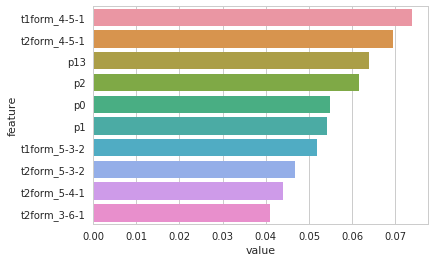

In [72]:
ax = sns.barplot(x="value", y="feature", data=importances_df.iloc[0:10])

## 加入提示

* 球員位置分配： p0-p2 前鋒、p3-p7 中場、p8-p12 後衛、p13 守門員

In [91]:
result_4_5_1  = dict(collections.Counter(df_new[df_new['t1form_4-5-1'] == 1]['win']))

print(f'當第一隊擺出 `4-5-1` 陣形時，贏了 {result_4_5_1[1]} 場，輸了 {result_4_5_1[0]} 場')

result_3_6_1  = dict(collections.Counter(df_new[df_new['t1form_3-6-1'] == 1]['win']))

print(f'當第一隊擺出 `3-6-1` 陣形時，贏了 {result_3_6_1[1]} 場，輸了 {result_3_6_1[0]} 場')

當第一隊擺出 `4-5-1` 陣形時，贏了 28041 場，輸了 62825 場
當第一隊擺出 `3-6-1` 陣形時，贏了 36304 場，輸了 54362 場


### 在這份資料集裡，擺上前鋒是王道啊！

### 好的守門員，讓你無後顧之憂

### 資料觀察：當兩隊限制在同一陣形時，每個位置球員重要性是否有差異？

In [181]:
form_type = '4-3-3'

df_forward = df_new[(df_new['t1form_'+form_type]==1) & (df_new['t2form_'+form_type]==1)][['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'win']]

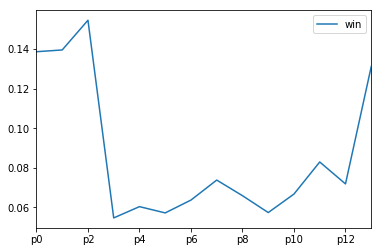

In [65]:
corr = df_forward.corr()
corr[['win']].drop(['win'],axis=0).plot()

In [95]:
form_type = '4-3-2-1'  ## 聖誕樹陣型

df_guard = df_new[(df_new['t1form_'+form_type]==1) & (df_new['t2form_'+form_type]==1)][['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'win']]

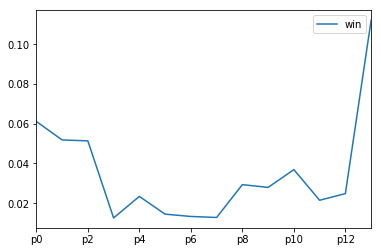

In [96]:
corr = df_guard.corr()
corr[['win']].drop(['win'],axis=0).plot()

In [105]:
form_type = '3-5-2'

df_guard = df_new[(df_new['t1form_'+form_type]==1) & (df_new['t2form_'+form_type]==1)][['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'win']]

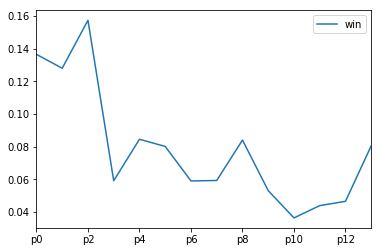

In [106]:
corr = df_guard.corr()
corr[['win']].drop(['win'],axis=0).plot()

### 已經知道欄位意義了，為了簡化資料，先把同位置合併

In [182]:
df_group = pd.DataFrame()

df_group['t1_f'] = (df['t1p0'] + df['t1p1'] + df['t1p2']) / 3
df_group['t1_c'] = (df['t1p3'] + df['t1p4'] + df['t1p5'] + df['t1p6'] + df['t1p7']) / 5
df_group['t1_g'] = (df['t1p8'] + df['t1p9'] + df['t1p10'] + df['t1p11'] + df['t1p12']) / 5
df_group['t1_k'] = df['t1p13']

df_group['t2_f'] = (df['t2p0'] + df['t2p1'] + df['t2p2']) / 3
df_group['t2_c'] = (df['t2p3'] + df['t2p4'] + df['t2p5'] + df['t2p6'] + df['t2p7']) / 5
df_group['t2_g'] = (df['t2p8'] + df['t2p9'] + df['t2p10'] + df['t2p11'] + df['t2p12']) / 5
df_group['t2_k'] = df['t2p13']

df_group['win'] = df_new['win']

positions = ['t1_f', 't1_c', 't1_g', 't1_k', 't2_f', 't2_c', 't2_g', 't2_k']
#df_group[positions] = df_group[positions].apply(lambda x:(x-x.min()) / (x.max() - x.min()))

In [183]:
X = df_group[positions].values
y = df_group[['win']].values

In [184]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

model_position = XGBClassifier(nthread=-1)
model_position.fit(X_train, y_train)
test_pred = model_position.predict(X_test)

### 欄位減少，準確率甚至還比原本好一點

In [185]:
acc = metrics.accuracy_score(y_test, test_pred)
print('準確率:', acc)

準確率: 0.6572233333333334


## 來預測對戰勝負遊吧！

In [194]:
team_1 = {'f': 17.27, 'c': 6.76, 'g': 7.34, 'k': 10.0}
team_2 = {'f': 2.27, 'c': 6.76, 'g': 3.34, 'k': 1.0}
position = ['f', 'c', 'g', 'k']

def predict(team_1, team_2):
    feature = [None] * 8
    for idx, pos in enumerate(position):
        feature[idx] = team_1[position[idx]]
        feature[idx+4] = team_2[position[idx]]
        
    result = model_position.predict_proba(np.asarray(feature).reshape(1, 8))[0]
    win_team = 1
    if result[0] > result[1]:
        win_team = 2
    
    print(f'比賽結果：team{win_team} 獲勝！獲勝機率是：{result[1]}')
        
predict(team_1, team_2)

比賽結果：team1 獲勝！獲勝機率是：0.9188937544822693


## 25 分鐘想一個優化的方式，建立一個自創的模型

* 創造一個新的欄位，再做訓練，並觀察結果
* 你有辦法預測勝分差嗎？(是哪一種問題？分類、迴歸、聚類)
    * 參考範例：https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* 模擬4個球隊數據，打一個小小世界盃，並觀察對戰順序改變，結果是否不同？